<a href="https://colab.research.google.com/github/myracheng/texturesynt/blob/master/texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/myracheng/texturesynt.git


Cloning into 'texturesynt'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 1), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [5]:
cd texturesynt

/content/texturesynt


In [6]:
import warnings
import matplotlib.cm as cm
import torch
import torchvision.models as models
from PIL import Image
from texturesynt.texture_synth_exaggerate import *
warnings.filterwarnings('ignore')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = models.vgg19(pretrained=True).features.to(device).eval()
image_size = 128

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth


In [0]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'texture2')

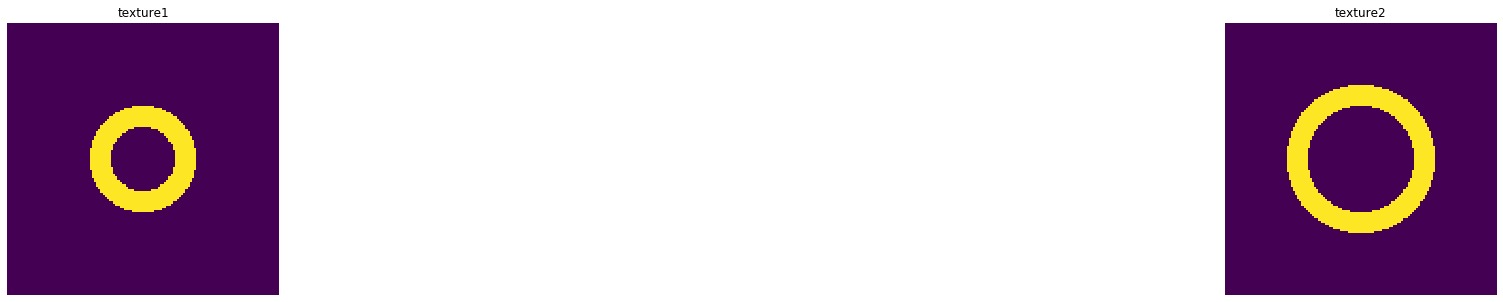

In [9]:
texture_image1 = circle_map(20, 10, (128,128))
texture_image1 = np.stack((texture_image1,texture_image1,texture_image1))
texture_image1 = texture_image1[np.newaxis,...]

texture_image2 = circle_map(30, 10, (128,128))
texture_image2 = np.stack((texture_image2,texture_image2,texture_image2))
texture_image2 = texture_image2[np.newaxis,...]

fig, ax = plt.subplots(1, 2, figsize=(0, 5))

ax[0].imshow(texture_image1[0,0,...])
ax[0].axis('off')
ax[0].set_title('texture1')
ax[1].imshow(texture_image2[0,0,...])
ax[1].axis('off')
ax[1].set_title('texture2')

In [0]:
num_steps = 300
alpha_arr = [-1,0,1,2]
synthesized_imgs = []
for alpha in alpha_arr:
    synthesized_img = run_texture_synthesis_exaggerate(cnn, texture_image1, texture_image2, alpha,
                                                       image_size, num_steps, device)
    synthesized_imgs.append(synthesized_img)
    
clear_output()

Building the texture model..

Optimizing..

run 100
loss : 1.16e+02



In [0]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

ax[0][0].imshow(texture_image1[0,0,...])
ax[0][0].axis('off')
ax[0][0].set_title('texture image1')

ax[0][1].axis('off')
ax[0][2].axis('off')

ax[0][3].imshow(texture_image2[0,0,...])
ax[0][3].axis('off')
ax[0][3].set_title('texture image2')

for i, alpha in enumerate(alpha_arr):
    ax[1][i].imshow(synthesized_imgs[i][0,0,...])
    ax[1][i].axis('off')
    ax[1][i].set_title(r'synthesized image, $\alpha$ = {}'.format(alpha))